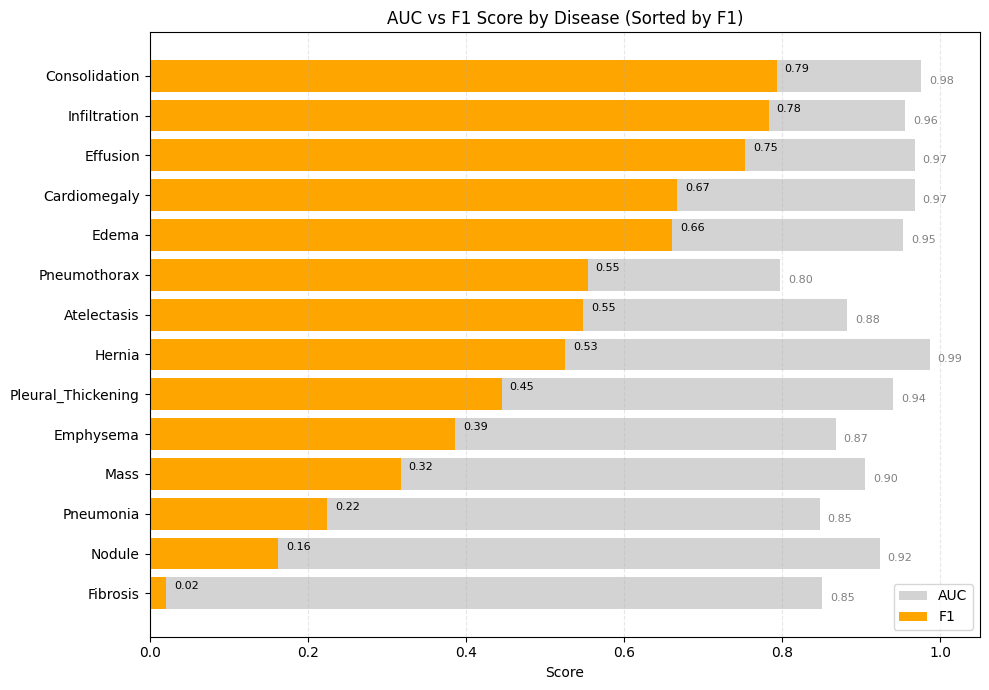

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# 텍스트 입력
text_data = """
  Atelectasis: AUC=0.8822, F1=0.5480, Accuracy=0.8879
  Consolidation: AUC=0.9754, F1=0.7929, Accuracy=0.9823
  Infiltration: AUC=0.9556, F1=0.7828, Accuracy=0.9163
  Pneumothorax: AUC=0.7977, F1=0.5538, Accuracy=0.7635
  Edema: AUC=0.9528, F1=0.6606, Accuracy=0.9523
  Emphysema: AUC=0.8675, F1=0.3865, Accuracy=0.9397
  Fibrosis: AUC=0.8502, F1=0.0212, Accuracy=0.9784
  Effusion: AUC=0.9672, F1=0.7530, Accuracy=0.9493
  Pneumonia: AUC=0.8474, F1=0.2245, Accuracy=0.9304
  Pleural_Thickening: AUC=0.9405, F1=0.4451, Accuracy=0.9656
  Cardiomegaly: AUC=0.9675, F1=0.6673, Accuracy=0.9715
  Nodule: AUC=0.9233, F1=0.1629, Accuracy=0.9839
  Mass: AUC=0.9044, F1=0.3175, Accuracy=0.9578
  Hernia: AUC=0.9862, F1=0.5254, Accuracy=0.9978
"""

# 텍스트 파싱 → DataFrame
pattern = r"(\w+): AUC=([\d.]+), F1=([\d.]+)"
matches = re.findall(pattern, text_data)
df = pd.DataFrame(matches, columns=["Disease", "AUC", "F1"])
df["AUC"] = df["AUC"].astype(float)
df["F1"] = df["F1"].astype(float)

# F1 기준 정렬
df_sorted = df.sort_values(by="F1", ascending=True).reset_index(drop=True)

# 시각화
plt.figure(figsize=(10, 7))
y_pos = range(len(df_sorted))

plt.barh(y_pos, df_sorted["AUC"], color='lightgray', label='AUC')
plt.barh(y_pos, df_sorted["F1"], color='orange', label='F1')

# 수치 표시
for i in y_pos:
    plt.text(df_sorted["AUC"][i] + 0.01, i - 0.2, f"{df_sorted['AUC'][i]:.2f}", fontsize=8, color='gray')
    plt.text(df_sorted["F1"][i] + 0.01, i + 0.1, f"{df_sorted['F1'][i]:.2f}", fontsize=8, color='black')

plt.yticks(y_pos, df_sorted["Disease"])
plt.xlabel("Score")
plt.title("AUC vs F1 Score by Disease")
plt.xlim(0, 1.05)
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()

plt.savefig("auc_f1_horizontal_bar_sorted_by_f1.png", dpi=300)
plt.show()
